##  Introduction

Real-world data rarely comes clean. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In this analysis, I will get the WeRateDogs data through tweepy, will wrangle them, and will provide insights thorugh analysis and visualization.

## Gathering data

Importing packages.

In [2]:
import pandas as pd
import numpy as np
import requests as r
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### df_enhanced

Creating df_enhanced that reads 'twitter-archive-enhanced.csv'.

In [3]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### df_imgprd

In [6]:
# requesting for image prediction file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = r.get(url)

Creating df_imgprd to read the image prediction file. 

The url is 'tsv' file so "sep = '\t'" must be included in reading.

In [7]:
df_imgprd = pd.read_csv(url, sep = '\t')
df_imgprd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


df_imgprd info.

In [8]:
df_imgprd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### df_status

Getting access to twitter API using tweepy.

In [9]:
# Access to the API
consumer_key = 'nP66dzxgpUVCuS7NfNA9rZkIC'
consumer_secret = 'zhQVEs083d3L50zkf07IAiI42Yv32NV36GtRe68vMPSHOzZgMx'
access_token = '2989405526-jayIjM07G1YxEyiDQgVLyimz6gDtgmMYEbWBhVl'
access_secret = 'BgxMAlNVcW9qZwyThBUFZB2Eo7FAGhmbp2r9XSVne3Fci'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

Creating list of tweet_id from df_enhanced.

In [10]:
# creating list of tweet_id
en_id = df_enhanced['tweet_id']
en_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

Creating list containing tweet_id in exception

In [11]:
e_id = []

Using en_id to get twitter archive and writing down the result in "tweet_json.txt"

In [12]:
# setting the code timer
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# writing on the file
with open('tweet_json.txt', 'w', encoding = 'utf-8') as tweet_json:
    for tweet_id in en_id:
        try:
            status = api.get_status(tweet_id, tweet_mode='extended')
            # writing _json in line by line format into the file
            json.dump(status._json, tweet_json)
            tweet_json.write('\n')
        except tweepy.TweepError as e:
            e_id.append(tweet_id)    

Rate limit reached. Sleeping for: 722


There are 25 data missing due to TweepError.

In [13]:
len(e_id)

25

Creating df_tweet_json to read the edited tweet_json.txt.

In [14]:
df_tweet_json = pd.read_json('tweet_json.txt', lines = True)
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

Taking 'id','favorite_count', 'retweet_count', and 'created_at' from the the columns above and creating df_status.

In [15]:
df_status = df_tweet_json[['id','favorite_count','retweet_count','created_at']]
df_status.head()

,id,favorite_count,retweet_count,created_at
0,892420643555336193,36528,7778,2017-08-01 16:23:56
1,892177421306343426,31473,5763,2017-08-01 00:17:27
2,891815181378084864,23719,3814,2017-07-31 00:18:03
3,891689557279858688,39855,7950,2017-07-30 15:58:51
4,891327558926688256,38049,8577,2017-07-29 16:00:24


## Assessing data

### df_enhanced

Visually looking at it,

In [16]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


1. "source" seems to be in weird format : <ahref="...">
2. Numerous "doggo" to "puppo" are None.
3. Some dog names are "a", "the", "an", "None", and etc.
4. A lot of unnecessary columns.

Programmatically lookg at it,

In [17]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

1. There are 181 retweets.
2. Timestamp is in string, status_ids and user_id are in float.

In [18]:
# checking for duplicate values
df_enhanced.duplicated().value_counts()

False    2356
dtype: int64

No duplicates in df_enhanced.

In [19]:
# checking rating_denominator
df_enhanced.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

Some denominators are less than 10, and more than 10 and even whopping 100.

In [20]:
# checking rating_numerator
df_enhanced.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

Some numerators are abnormally high such as 1776!

Checking the Null values.

In [21]:
df_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

df_enhanced has null values in "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls".

### df_imgprd

Visually looking it,

In [22]:
df_imgprd

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The name of dogs include small letters, -, and _.

In [23]:
df_imgprd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No null value for df_imgprd.

In [24]:
df_imgprd.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

No duplicated values in df_imgprd.

In [25]:
df_imgprd.duplicated().value_counts()

False    2075
dtype: int64

### df_status

Visually and programmatically, there seems to be not much problem in df_status.

In [26]:
df_status

,id,favorite_count,retweet_count,created_at
0,892420643555336193,36528,7778,2017-08-01 16:23:56
1,892177421306343426,31473,5763,2017-08-01 00:17:27
2,891815181378084864,23719,3814,2017-07-31 00:18:03
3,891689557279858688,39855,7950,2017-07-30 15:58:51
4,891327558926688256,38049,8577,2017-07-29 16:00:24
5,891087950875897856,19143,2867,2017-07-29 00:08:17
6,890971913173991426,11153,1875,2017-07-28 16:27:12
7,890729181411237888,61587,17355,2017-07-28 00:22:40
8,890609185150312448,26368,3951,2017-07-27 16:25:51
9,890240255349198849,30154,6764,2017-07-26 15:59:51


In [27]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
created_at        2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.9 KB


No null values.

In [28]:
df_status.isnull().sum()

id                0
favorite_count    0
retweet_count     0
created_at        0
dtype: int64

No duplicated values.

In [29]:
df_status.duplicated().value_counts()

False    2331
dtype: int64

#### Quality

For df_enhanced :
1. The source format is weirdly structured such as '<a href=..'.
2. The type of Timestamp, in_reply_to_status_user_id, in_reply_to_status_id should be fixed.
3. Some dog names are erroneous such as "a", "quite", etc. Also, some are lowercase.
4. Some denominators are abnormally set, such as 170. 
5. Some numerators are abnormally set, such as 1776. Perhaps, they are decimals like 17.76.
6. Retweet columns mean duplicated so they should be dropped.
7. The null values in data.

For df_imgprd :
8. p1,p2,p3 have non-dog names such as 'box-turtle', 'goose', 'desk', and etc.
9. p1,p2,p3 have names containing lowercase and _.

#### Tidiness

1. The categories in df_enhanced, such as doggo, puppo, floofer, and pupper should be in one category, "dog_stage".
2. p1,p2,p3 have so many columns followed by. These will be compressed into one column.
3. 3 data into 1 data.

## Cleaning Data

I have created copies of the three data.

In [30]:
df_new_en = df_enhanced.copy()
df_new_imgprd = df_imgprd.copy()
df_new_status = df_status.copy()

## Quality

### 1. The source format is weirdly structured such as '<a href=..'

#### Define:

Delete form of <a..> and </ a> and remain only the words between <a..> and </ a>.

And change the type to category.

Example Below :

In [31]:
df_new_en.source[100]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### Code:

In [32]:
for source in df_new_en.source:
    new_resource = re.search('<a href=.*>(.*)</a>', source)
    # replacing each source with the new_resource
    df_new_en.source = df_new_en.source.str.replace(source, new_resource[1])   

Checking the uniqueness of the edited source,

In [33]:
df_new_en.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

The "Vine - Make a Scene" should be changed to "Vine" only.

In [34]:
# Chaning 'Vine - Make a Scene' to 'Vine'
for source in df_new_en.source:
    if source == 'Vine - Make a Scene':
        df_new_en.source = df_new_en.source.str.replace(source, "Vine")

Changing the data type to category.

In [35]:
# changing the data type to category
df_new_en.source = df_new_en.source.astype('category')

#### Testing

The source got changed and is in category form.

In [36]:
df_new_en.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): [TweetDeck, Twitter Web Client, Twitter for iPhone, Vine]

In [37]:
df_new_en.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### 2. The type of Timestamp, in_reply_to_status_user_id, in_reply_to_status_id should be fixed.

#### Define :

Change column type, "in_reply_to_status_id" and "in_reply_to_user_id", from float to string.

For N/A value, convert it to be NaN.

Also, change column type, "timestamp", from string to datetime.

In [38]:
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), float64(4

#### Coding :

In [39]:
# Changing "in_reply_to_status_id" to integer with filling the NA value as NaN
df_new_en.in_reply_to_status_id = df_enhanced.in_reply_to_status_id.fillna('NaN').astype(str)
# Changing "in_reply_to_user_id" to integer
df_new_en.in_reply_to_user_id = df_enhanced.in_reply_to_user_id.fillna('NaN').astype(str)
# Changing "timestamp" to datetime
df_new_en.timestamp = pd.to_datetime(df_new_en.timestamp)

#### Testing :

In [40]:
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1),

In [41]:
df_new_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 3. Some dog names are erroneous such as "a", "quite", "None", etc.

In [42]:
df_new_en.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Bella         6
Rusty         6
Stanley       6
Jack          6
Milo          6
Oscar         6
Koda          6
Dave          6
Jax           6
Scout         6
Alfie         5
           ... 
Keet          1
Tater         1
Barney        1
Billy         1
Skittle       1
Derby         1
Finnegus      1
Robin         1
Malikai       1
Fillup        1
Benny         1
Tino          1
Obi           1
Jed           1
Willie        1
Pubert        1
Noosh         1
Clifford      1
Winifred      1
Mairi         1
Ebby          1
Cupid         1
Mutt          1
Colin         1
Ricky         1
Griswold      1
Liam          1
Meatball      1
Tito          1
Skye          1
Name: name, Length: 957,

From above, usually, lower-alphabets have the form of "a, quite, an, the. and etc...".

#### Define :

Change the lower-alphabets and None to new word "No-Name".

#### Coding :

In [43]:
# Changing the name of low-letter to No-Name
df_new_en.name[df_new_en.name.str.match("^[a-z0-9_\-]+$")] = 'No-Name'
# Changing the name of None to No-Name
df_new_en.name[df_new_en.name.str.match("None")] = "No-Name"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Testing :

Creating list and filling this list with low-letter or None to check if there's any of them left.

In [44]:
# List of Low_letter
low_letter_list = []
# Checking if there's any name with low_letter or None
for name in df_new_en.name :
    if re.findall("^[a-z0-9_]+", name) != [] :
        low_letter_list.append(name)
    elif name == "None":
        low_letter_list.append(name)

The procedure is complete and all the low letters and None are changed to No-Name.

In [45]:
len(low_letter_list)

0

In [46]:
df_new_en.name.value_counts()

No-Name     854
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Toby          7
Bailey        7
Daisy         7
Buddy         7
Bella         6
Leo           6
Dave          6
Stanley       6
Rusty         6
Jack          6
Koda          6
Milo          6
Oscar         6
Jax           6
Scout         6
Alfie         5
Louis         5
Chester       5
Bentley       5
           ... 
Tater         1
Barney        1
Billy         1
Skittle       1
Jackie        1
Bobb          1
Derby         1
Benny         1
Ebby          1
Tino          1
Obi           1
Jed           1
Willie        1
Pubert        1
Noosh         1
Clifford      1
Malikai       1
Winifred      1
Cupid         1
Finnegus      1
Mutt          1
Colin         1
Ricky         1
Griswold      1
Liam          1
Meatball      1
Tito          1
Mairi         1
Robin         1
Crumpet       1
Name: name, Length: 932,

### 4. Some denominators are abnormally set, such as 170.

In [47]:
df_new_en.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

From seeing above, there are a lot of values other than 10. 

For those denominators other than 10, they will divide numerator and the divided-numerator will be the new numerator.

After the division, I will drop the denominator column and will rename the numerator column to be "Revised_rating".

#### Define :

Change the type of numerator and denominator to float for the division.

Divide the numerator by denominator that is not 10 and 0, and times the result by 10, and round them to nearest integer.

eg. 10 * (numerator / denominator) for the denominator not 10 and 0.

Drop the rating_denominator column

Rename the numerator column as "revised_rating".

Change the type of "revised_rating" to integer.

#### Coding :

Changing types of numerator and denominator to float.

In [48]:
# Changing types of numerator and denominator
df_new_en.rating_numerator = df_new_en.rating_numerator.astype(float)
df_new_en.rating_denominator = df_new_en.rating_denominator.astype(float)

Changing the rating_numerator to the value of 10*(numerator / denominator) for denominator that are not 10 and 0.

In [49]:
# Changing the numerator
for num, denom in zip(df_new_en.rating_numerator, df_new_en.rating_denominator):
    if denom != 10 and denom!= 0:
        df_new_en.rating_numerator = df_new_en.rating_numerator.replace(round(10*(num/denom),1))

Dropping the rating_denominator column.

In [50]:
# Dropping the rating_denominator column
df_new_en.drop(['rating_denominator'], axis=1, inplace=True)

Renaming the rating_numerator to revised_rating.

In [51]:
# Renaming the rating_numerator to revised_rating
df_new_en.rename(columns={'rating_numerator' : 'revised_rating / 10'}, inplace=True)

Changing the type back to integer.

In [52]:
df_new_en['revised_rating / 10'] = df_new_en['revised_rating / 10'].astype(int)

#### Testing:

Dropped rating_denominator and renamed rating_numerator to revised_rating.

In [53]:
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
revised_rating / 10           2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(1

In [54]:
df_new_en['revised_rating / 10'].value_counts().sort_index()

0          4
1         21
3        124
4        112
6        149
7        208
8        414
13      1067
14       137
15         2
17         1
20         6
24         3
26        18
27         1
44         2
45         1
50         4
60        12
75         4
80         6
84         1
88        15
99        11
121        1
143        1
144        8
165        3
182        1
204        5
420        3
666        1
960        2
1776       8
Name: revised_rating / 10, dtype: int64

### 5. Some numerators are abnormally set, such as 1776. Perhaps, they are decimals like 17.76.

According to WeRateDogs official page, "16/10 simply isn't sustainable for the dog rating industry."

But considering inflaton, I will set 20/10 to be the maximum so I will conisder rating above 20 to be wrongly typed decimal, such 24 to 2.4.

Source : https://twitter.com/dog_rates/status/895773482436481024

#### Define :

Convert numerator values above 20 to decimal lower than 20 and round them to the integers.

#### Coding :

To perform the coding, I will divide the coding into two parts :

1. For numerator above 20 and below 200, they will be divided by 10 and its quotient and remnants will be transformed to decimals and be rounded to nearest integer.

    eg. 156 to 15.6 to 16, 182 to 18.2 to 18.
    

2. For numerator above 200, they will be transformed in same manner.

    eg. 1776 to 17.76 to 18, 960 to 9.6 to 10.

In [55]:
for num in df_new_en['revised_rating / 10']:
    # first part of the coding
    if num > 20 and num <= 200:
        # dividing numerator by 10 and getting the quotient and remain.
        number = divmod(num,10)
        # transforming the quotient and remnants to rounded nearest integer
        new_number = round(float('{}.{}'.format(number[0],number[1])),0)
        # applying the changed number
        df_new_en['revised_rating / 10'] = df_new_en['revised_rating / 10'].replace(num, new_number)
    # second part of coding    
    elif num > 200 :
        # divding numerator by 100 and getting the quotient and remain. 
        number = divmod(num,100)
        # transforming the quotient and remnants.
        new_number = round(float('{}.{}'.format(number[0],number[1])),0)
        # applying the changed number.
        df_new_en['revised_rating / 10'] = df_new_en['revised_rating / 10'].replace(num, new_number)       

### Testing :

Now I get new 'revised_rating / 10'.

In [56]:
df_new_en['revised_rating / 10'].value_counts().sort_index()

0        4
1       21
2        8
3      143
4      118
5        4
6      161
7      209
8      425
9       15
10      13
12       1
13    1067
14     146
15       2
16       3
17       1
18       9
20       6
Name: revised_rating / 10, dtype: int64

### 6. Retweet columns show duplicated so they should be dropped.

#### Define :

Drop the rows with retweet values that are not null.

And drop the retweet columns.

#### Coding :

In [57]:
# changing the df_new_en with the retweeted_status_id that are all null.
df_new_en = df_new_en.query('retweeted_status_id == "NaN"')

In [58]:
df_new_en.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

#### Testing :

No more retweeted_status.

And no more retweet columns.

In [59]:
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2117 non-null object
revised_rating / 10      2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(9)
memory usage: 223.2+ KB


### 7. The null values in the data.

In [60]:
df_new_en.isnull().sum()

tweet_id                  0
in_reply_to_status_id     0
in_reply_to_user_id       0
timestamp                 0
source                    0
text                      0
expanded_urls            58
revised_rating / 10       0
name                      0
doggo                     0
floofer                   0
pupper                    0
puppo                     0
dtype: int64

From above, there are 58 null values in expanded urls.

#### Define :

Fill the null values in expanded_urls with "NaN"

#### Coding :

In [61]:
# Filling the null values with "NaN"
df_new_en.expanded_urls = df_new_en.expanded_urls.fillna("NaN")

#### Testing :

There are zero null values in the data now.

In [62]:
df_new_en.isnull().sum()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
revised_rating / 10      0
name                     0
doggo                    0
floofer                  0
pupper                   0
puppo                    0
dtype: int64

### 8. For df_imgprd, p1,p2,p3 have non-dog names such as 'box-turtle', 'goose', 'desk', and etc.

In [63]:
df_new_imgprd.query('p1_dog == False and p2_dog == False and p3_dog == False')[['p1','p1_dog','p2','p2_dog','p3','p3_dog']].head()

,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,box_turtle,False,mud_turtle,False,terrapin,False
17,hen,False,cock,False,partridge,False
18,desktop_computer,False,desk,False,bookcase,False
21,three-toed_sloth,False,otter,False,great_grey_owl,False
25,guinea_pig,False,skunk,False,hamster,False


From visually looking at above, it shows that non-dog names are listed where p1_dog, p2_dog, and p3_dog are all False.

Such predictions based on non-dogs are actually unnecessary for the data analysis so I will drop them.

eg. non_basket, umbrella, banana, etc.

#### Define:

Drop the lists where p1_dog, p2_dog, and p3_dog are False.

#### Coding :

In [64]:
df_new_imgprd = df_new_imgprd.query('p1_dog == True and p2_dog == True and p3_dog == True')

#### Testing :

In [65]:
len(df_new_imgprd.query('p1_dog == False and p2_dog == False and p3_dog == False'))

0

### 9. p1,p2,p3 have names containing lowercase and _.

Some names are not capitalized and contain _ instead of the space.

#### Define :

Capitalize all names in p1,p2,p3 and substitute _ to space.

#### Coding :

In [66]:
# Capitalizing the name and substituting _ to space
df_new_imgprd.p1 = df_new_imgprd.p1.str.capitalize().str.replace('_',' ')
df_new_imgprd.p2 = df_new_imgprd.p2.str.capitalize().str.replace('_',' ')
df_new_imgprd.p3 = df_new_imgprd.p3.str.capitalize().str.replace('_',' ')

#### Testing :

In [67]:
df_new_imgprd.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness

### 1. The categories in df_enhanced, such as doggo, puppo, floofer, and pupper should be in one category, "dog_stage"

#### Define :

Merge 'doggo' to 'puppo' into 'dog_stage' column and drop 'doggo' to 'puppo'.

Change the data type of dog_stage to category.

In [68]:
# merging doggo, floofer, pupper, and puppo into dog_stage
df_new_en['dog_stage'] = df_new_en[['doggo','floofer','pupper','puppo']].max(axis=1)

In [69]:
# dropping doggo, floofer, pupper, puppo columns
df_new_en.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [70]:
df_new_en.dog_stage = df_new_en.dog_stage.astype('category')

#### Testing :

Doggo to Puppo columns are dropped and dog_stage is category type.

In [71]:
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null category
text                     2175 non-null object
expanded_urls            2175 non-null object
revised_rating / 10      2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null category
dtypes: category(2), datetime64[ns](1), int64(2), object(5)
memory usage: 157.6+ KB


The categories of dog_stage contain None, pupper, doggo, puppo, and floofer.

In [72]:
df_new_en.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

### 2. p1,p2,p3 have so many columns followed by. These will be compressed into one column.

In [73]:
df_new_imgprd.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

As shown above, each p1, p2, and p3 are followed by p1_conf, p1_dog, p2_conf, and etc, which seems unnecessary. So I will compress them by creating one column, "dog_type", getting only the p1, p2, or p3 with maximum p_conf.

#### Define :

Creating new column "dog_type" and fill in it with the maximum p_conf.

#### Coding :

First, it seems like p1_conf is always higher than p2_conf and p3_conf.

Does this apply to all of the rows?

In [74]:
# Comparing number of original data with data of p1_conf > p2_conf and p3_conf
len(df_new_imgprd) == len(df_new_imgprd.query('p1_conf > p2_conf and p1_conf > p3_conf'))

True

Since the answer sets out to be True, I will fill all "p1" into "dog_type" and drop the rest.

In [75]:
# Filling the new column "dog_type" with "p1"
df_new_imgprd['dog_type'] = df_new_imgprd.p1

In [76]:
# Dropping p1 ,p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
df_new_imgprd.drop(['p1','p2_conf','p3_conf','p2','p3','p1_conf','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)

#### Testing :

Dropped rest of p series columns and created new column, 'dog_type'.

In [77]:
df_new_imgprd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
img_num     1243 non-null int64
dog_type    1243 non-null object
dtypes: int64(2), object(2)
memory usage: 48.6+ KB


In [78]:
df_new_imgprd.dog_type.value_counts().head()

Golden retriever      126
Pembroke               78
Labrador retriever     77
Chihuahua              54
Pug                    41
Name: dog_type, dtype: int64

### 3 data into 1 data.

There are df_new_en, df_new_imgprd, and df_new_status : 3 data.

Therefore they should be merged into 1 data.

Merging will be used with "inner" merging to prevent null values.

#### Define :

Rename the "id" to "tweet_id" in df_new_status.

#### Coding :

In [79]:
# Renaming from id to tweet_id
df_new_status.rename({'id' : 'tweet_id'}, axis=1, inplace=True)

#### Testing :

In [80]:
df_new_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
created_at        2331 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.9 KB


Next, the three data will be merged with same tweet_id.

#### Define :

Merge the 3 data into one data, "df_master_data".

#### Coding :

Merging "df_new_en" and "df_new_status" with "df_new_imgprd", while saving original data of df_new_imgprd.

In [103]:
# Merging df_new_en in favor of df_new_imgprd
df_master_data = df_new_en.merge(df_new_imgprd, on="tweet_id", how="inner")

In [104]:
# Merging df_new_status in favor of df_new_imgprd
df_master_data = df_master_data.merge(df_new_status, on="tweet_id", how="inner")

#### Testing :

Merged the 3 data into "df_master_data".

In [105]:
df_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 16 columns):
tweet_id                 1196 non-null int64
in_reply_to_status_id    1196 non-null object
in_reply_to_user_id      1196 non-null object
timestamp                1196 non-null datetime64[ns]
source                   1196 non-null category
text                     1196 non-null object
expanded_urls            1196 non-null object
revised_rating / 10      1196 non-null int64
name                     1196 non-null object
dog_stage                1196 non-null category
jpg_url                  1196 non-null object
img_num                  1196 non-null int64
dog_type                 1196 non-null object
favorite_count           1196 non-null int64
retweet_count            1196 non-null int64
created_at               1196 non-null datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(5), object(7)
memory usage: 142.9+ KB


No duplicated values.

In [84]:
df_master_data.duplicated().sum()

0

No null values.

In [85]:
df_master_data.isnull().sum()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
revised_rating / 10      0
name                     0
dog_stage                0
jpg_url                  0
img_num                  0
dog_type                 0
favorite_count           0
retweet_count            0
created_at               0
dtype: int64

#### * It seems like timestamp and created_at are same. If they are identical, I will drop the created_at.

#### Define :

Check if timestamp and created_at are identical.

If yes, drop created_at.

#### Coding :

The coding below clearly shows that timestamp and created_at are actually identical.

In [119]:
# Number of non-identical timestamp and created_at
len(df_master_data.query('timestamp != created_at'))

0

Dropping the created_at.

In [120]:
df_master_data.drop(['created_at'], axis=1, inplace=True)

#### Testing :

Dropped created_at from df_master_data.

In [125]:
'created_at' in df_master_data.columns

False

### Saving the "df_master_data" as "twitter_complete.csv"

In [126]:
df_master_data.to_csv("twitter_complete.csv")

## Analyzing and Visualizing

In [127]:
df_master_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,revised_rating / 10,name,dog_stage,jpg_url,img_num,dog_type,favorite_count,retweet_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,31473,5763
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,13,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,23719,3814
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,13,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,38049,8577
3,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,No-Name,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,61587,17355
4,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish terrier,26368,3951


In [128]:
df_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 15 columns):
tweet_id                 1196 non-null int64
in_reply_to_status_id    1196 non-null object
in_reply_to_user_id      1196 non-null object
timestamp                1196 non-null datetime64[ns]
source                   1196 non-null category
text                     1196 non-null object
expanded_urls            1196 non-null object
revised_rating / 10      1196 non-null int64
name                     1196 non-null object
dog_stage                1196 non-null category
jpg_url                  1196 non-null object
img_num                  1196 non-null int64
dog_type                 1196 non-null object
favorite_count           1196 non-null int64
retweet_count            1196 non-null int64
dtypes: category(2), datetime64[ns](1), int64(5), object(7)
memory usage: 133.5+ KB


### I. Top 10 Favorite dog-type

I analayzed the top 10 Favorite dog-type in relation with dog_type and number of favorite_count. 

It turned out that "Lakeland terrier" earned the most favorite count, 130000+, and is followed by "Chihuahua", getting 120000+ counts.

It is interesting that no dogs got 90000+ and top6 to top10 earned 70000+, showing counting gap between top 1 and top 10 : top 1 is almost the double of top 10.

For visualization, I used horizontal bar-graph for its simplicity.  

In [89]:
# top 10 dog_type based on favorite_count
top10_dog = df_master_data[['dog_type','favorite_count']].sort_values(by='favorite_count', ascending=False).head(10)
top10_dog

,dog_type,favorite_count
199,Lakeland terrier,134561
273,Chihuahua,121914
78,French bulldog,117462
524,Eskimo dog,116579
40,English springer,100164
218,Standard poodle,88983
66,Golden retriever,79177
45,Chesapeake bay retriever,75257
23,Italian greyhound,73064
90,Chow,71877


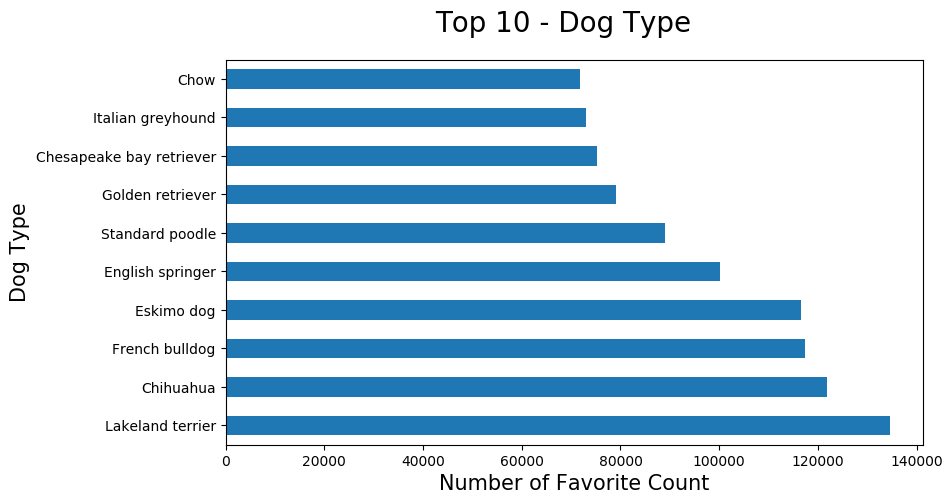

In [392]:
# Visualizing with bar plots

fig, ax = plt.subplots(figsize=(9,5))
top10_dog.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Number of Favorite Count', fontsize=15)
ax.set_ylabel('Dog Type', fontsize=15)
ax.set_yticklabels(top10_dog.dog_type, fontsize=10)
fig.suptitle('Top 10 - Dog Type', size=20)
plt.show()

### II. Correlation

After the top 10 dog-type, I analyzed correlation within favorite-count, retweet-count, and the rating.

I first expected three of them are correlated due to simple logic : more favorite, more retweet, so more rating, and vice versa.

However, the result shows that the rating has less to do with the favorite-count and the retweet-count while the favorite-count and the retweet-count are correlated above 75%.

I deduce that for the correlation between favorite-count and retweet-count, my previous simple logic works. For the rating, it can be done by numerous variances. Since rating can be done randomly, it makes sense that rating is less proportional to the favorite-count and retweet-count.

eg. tired users who feel bothered with the rating that they just rate automatic 10 to all dogs they encounter.

For the visualization, I showed correlation by seaborn heatmap to clearly show the relationship with three variables.

In [91]:
# data with favorite_count, retweet_count, and revised_rating columns.
df_corr = df_master_data[['favorite_count', 'retweet_count','revised_rating / 10']]

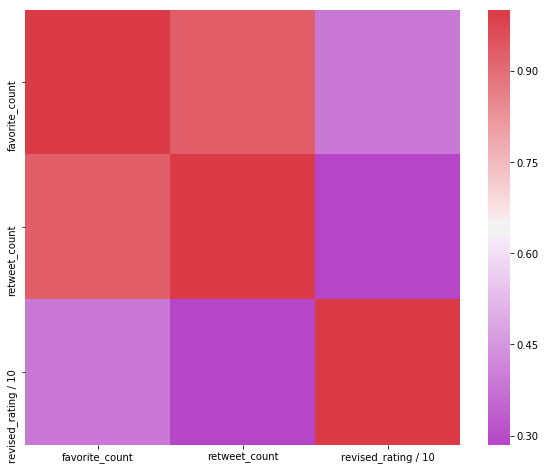

In [92]:
# Visualizing the corrleation with heatmap

f, ax = plt.subplots(figsize=(10, 8))
corr = df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(300, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### III. The productive date

For here, I analzyed the date to answer following questions :
1. Which year was most productive?
2. Which month was most productive in the most productive year?

In [134]:
# importing datatime package
import datetime as dt

#### Which year was most productive?

Checking the frequency of tweets in each year.

In [143]:
year_prod = df_master_data.timestamp.dt.to_period('Y').value_counts()
year_prod

2016    606
2015    353
2017    237
Freq: A-DEC, Name: timestamp, dtype: int64

To visualize,

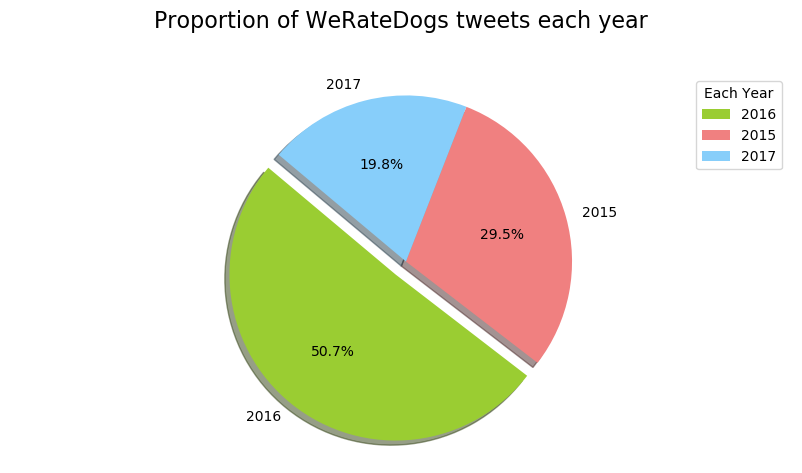

In [405]:
# Data to plot
labels = year_prod.index.strftime('%Y')
sizes = year_prod.values
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend(year_prod.index.strftime('%Y'), title="Each Year")
plt.title('Proportion of WeRateDogs tweets each year', size=16, y=1.1)
plt.show()

#### Which month was most productive in the most productive year?

From above visualization, it is clear that 2016 is the most productive year.

Therefore, I extracted data only within 2016 and seperated all months to find the most productive month.

In [228]:
# creating data of 2016
data_2016 = df_master_data.query('timestamp >= "2016-01-01" and timestamp < "2017-01-01"')
data_2016.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,revised_rating / 10,name,dog_stage,jpg_url,img_num,dog_type,favorite_count,retweet_count
237,814986499976527872,NaN,NaN,2016-12-31 00:08:17,Twitter for iPhone,This is Cooper. Someone attacked him with a sh...,https://twitter.com/dog_rates/status/814986499...,13,Cooper,pupper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,Dalmatian,7853,1320
238,814638523311648768,NaN,NaN,2016-12-30 01:05:33,Twitter for iPhone,This is Olivia. She's a passionate advocate of...,https://twitter.com/dog_rates/status/814638523...,13,Olivia,None,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,Golden retriever,11567,2784
239,814530161257443328,NaN,NaN,2016-12-29 17:54:58,Twitter for iPhone,This is Alf. Someone just rubbed a balloon on ...,https://twitter.com/dog_rates/status/814530161...,13,Alf,None,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,Miniature poodle,8879,1915
240,814153002265309185,NaN,NaN,2016-12-28 16:56:16,Twitter for iPhone,This is Oshie. He's ready to party. Bought tha...,https://twitter.com/dog_rates/status/814153002...,13,Oshie,None,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,Golden retriever,29566,8949
241,813910438903693312,NaN,NaN,2016-12-28 00:52:25,Twitter for iPhone,This is Chubbs. He dug a hole and now he's stu...,https://twitter.com/dog_rates/status/813910438...,13,Chubbs,doggo,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian husky,9545,1926


Checking for the tweets in each month of 2016.

In [357]:
# creating frequency of tweets in each month in 2016
prod_2016 =  data_2016.timestamp.dt.month.value_counts().sort_index()
prod_2016

1     101
2      71
3      77
4      33
5      31
6      44
7      48
8      36
9      42
10     41
11     37
12     45
Name: timestamp, dtype: int64

I imported calendar and converted months to their names.

Visuallizing the result,

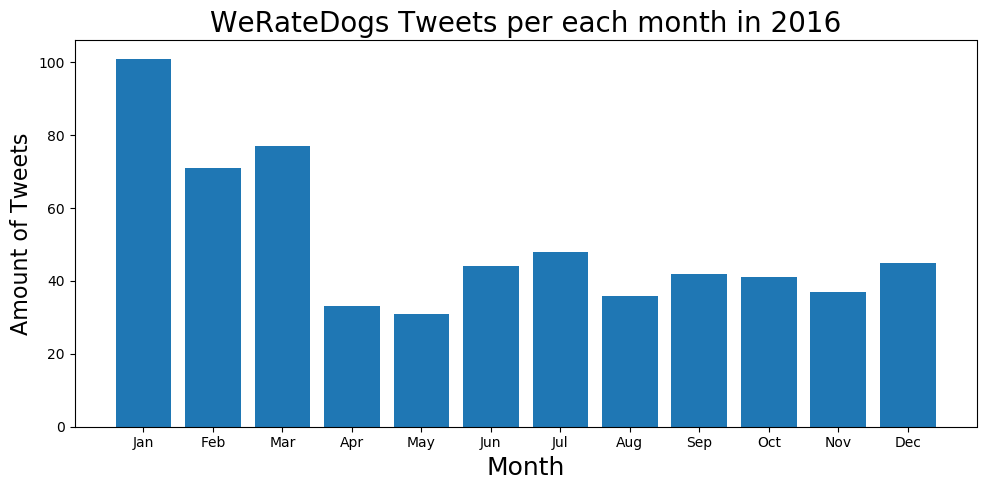

In [398]:
# Set default figure size.
plt.rcParams['figure.figsize'] = (10, 5)

# Plot data
fig, ax = plt.subplots()
month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
order = [1,2,3,4,5,6,7,8,9,10,11,12]

# Plot
ax.bar(x=order, height=prod_2016, tick_label=month)
plt.title('WeRateDogs Tweets per each month in 2016', size=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Amount of Tweets', fontsize=16)

# Make the chart fill out the figure better.
fig.tight_layout()


From the analysis above, it is evident that the most tweeted year is 2016 with 600+ tweets and most tweeted month in 2016 is January with 100+ tweets.

Perhaps, when new year starts, people usually want different lives from previous year that they buy dogs and post on Twitter to see how many ratings their dogs can get.

No matter what reasons can be, it is interesting to note that after March, the tweets drastically decrease from 70+ to 30+. People lose interest in dog twitting drastically after March!

For visuallization, I used pie chart for the "most tweeted year" and used bar chart for the "most tweeted month".

## Limitations

1. The data had numerous null values.
2. The rating was revised within my own metrics that the rating can be misleading.
3. I dropped a lot of data in process of merging 3 data using "on = inner"
4. The original data had zillions of NaN values at first place.
5. Dog names with non-dog names were all dropped but some of their names could have been recovered if I searched their names in text.